# project machine_learning

#### Talya Cuperman 213288343
#### Ester Carmiel 324125079

### Github link-https://github.com/estycar/pyton_project/blob/main/Talya%26Ester-project.ipynb

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
import seaborn as sns
from sklearn.pipeline import Pipeline
import requests
import time
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
import ppscore as pps
import joblib

### step 1- Data preparation

<div dir="rtl">
    
### ◊î◊°◊ë◊®◊ô◊ù ◊ï◊û◊î◊ú◊õ◊ô◊ù ◊©◊¢◊©◊ô◊†◊ï ◊¢◊ú ◊î◊ì◊ê◊ò◊î
- ◊î◊©◊ú◊û◊†◊ï ◊ô◊ì◊†◊ô◊™ ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊û◊°◊§◊® ◊¢◊û◊ï◊ì◊ï◊™ ◊ú◊§◊ô ◊î◊õ◊™◊ï◊ë ◊ë◊™◊ê◊ï◊®
- ◊û◊ó◊ß◊†◊ï ◊ê◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊©◊ú ◊î◊™◊ô◊ê◊ï◊®,◊ô◊û◊ô ◊õ◊†◊ô◊°◊î,◊û◊° ◊™◊©◊ú◊ï◊û◊ô◊ù ◊õ◊ô ◊î◊ù ◊ú◊ê ◊®◊ú◊ï◊ï◊†◊ò◊ô◊ù ◊ú◊†◊ï ◊ú◊û◊ï◊ì◊ú
 - ◊î◊ï◊®◊ì◊†◊ï ◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊¢◊ë◊ï◊® ◊î◊ò◊®◊ô◊ô◊ü ◊ë◊ú◊ë◊ì ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊©◊õ◊ï◊†◊î,◊õ◊™◊ï◊ë◊™, ◊ß◊ï◊û◊î ◊ï◊û◊ó◊ô◊®
 -  ◊î◊©◊ú◊û◊†◊ï ◊ú◊ê◊§◊° ◊ê◊™ ◊î◊¢◊®◊õ◊ô◊ù ◊î◊ó◊°◊®◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊í◊ô◊†◊î,◊†◊í◊ô◊©◊ï◊™ ◊ï◊û◊° ◊™◊û◊ï◊†◊ï◊™
 - ◊ò◊ô◊§◊ú◊†◊ï ◊ë◊¢◊®◊õ◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊™ ◊°◊ï◊í ◊î◊ì◊ô◊®◊î, ◊î◊ï◊®◊ì◊†◊ï ◊ê◊™ ◊î◊û◊ô◊ú◊ô◊ù ◊î◊ú◊ê ◊®◊ú◊ï◊ï◊†◊ò◊ô◊™ ◊õ◊û◊ï '◊ú◊î◊©◊õ◊®◊î' ◊ï◊õ◊ï
 - ◊î◊ï◊¶◊ê◊†◊ï ◊û◊î◊ò◊®◊ô◊ô◊ü ◊©◊ï◊®◊ï◊™ ◊©◊ú ◊†◊õ◊°◊ô◊ù ◊ú◊ê ◊®◊ú◊ï◊ï◊†◊ò◊ô◊ù ◊ú◊û◊ï◊ì◊ú ◊õ◊û◊ï ◊û◊ó◊°◊ü,◊ó◊†◊ô◊ô◊î ◊ï◊õ◊ú◊ú◊ô, ◊ê◊ù ◊ñ◊î ◊ß◊ï◊®◊î ◊ë◊ò◊°◊ò- ◊©◊ô◊©◊†◊î ◊ê◊™ ◊ñ◊î ◊ú◊ì◊ô◊®◊î
 -  ◊¢◊®◊õ◊ô◊ù ◊ë◊¢◊ô◊ô◊™◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊™ ◊î◊ß◊ï◊û◊î ◊õ◊û◊ï '3 ◊û◊™◊ï◊ö 5'◊ê◊ï ◊ß◊®◊ß◊¢ ◊û◊™◊ï◊ö ◊ß◊®◊ß◊¢ ◊°◊ô◊ì◊®◊†◊ï ◊©◊ô◊î◊ô◊î ◊®◊ß ◊û◊°◊§◊® ◊ë◊ß◊ï◊û◊î/ ◊°◊ö ◊ß◊ï◊û◊ï◊™ ◊ë◊î◊™◊ê◊ù ◊ú◊†◊ì◊®◊©. 
- ◊î◊ô◊ï ◊©◊ï◊®◊ï◊™ ◊©◊û◊°◊§◊® ◊î◊ó◊ì◊®◊ô◊ù ◊ë◊î◊ù ◊î◊ô◊î ◊ê◊§◊° ◊ú◊õ◊ü ◊ò◊ô◊§◊ú◊†◊ï ◊ë◊î◊ù ◊ë◊¶◊ï◊®◊î ◊î◊ë◊ê◊î: ◊ú◊ß◊ó◊†◊ï ◊ê◊™ ◊©◊ò◊ó ◊î◊ì◊ô◊®◊î ◊ï◊ó◊ô◊©◊ë◊†◊ï ◊ó◊¶◊ô◊ï◊ü ◊ë◊î◊™◊ê◊û◊î ◊ú◊©◊ê◊® ◊î◊©◊ò◊ó◊ô◊ù ◊ï◊ú◊§◊ô ◊û◊° ◊î◊ó◊ì◊®◊ô◊ù ◊ë◊î◊™◊ê◊û◊î,◊ë◊û◊ô◊ì◊î ◊ï◊ú◊ê ◊î◊ô◊î ◊©◊ò◊ó ◊û◊™◊ê◊ô◊ù ◊ú◊ß◊ó◊†◊ï ◊©◊†◊ô◊ô◊ù ◊ú◊û◊¢◊ú◊î ◊ï◊©◊†◊ô◊ô◊ù ◊ú◊û◊ò◊î
-  ◊¢◊ë◊ï◊® ◊î◊ò◊®◊ô◊ô◊ü ◊ë◊ú◊ë◊ì ◊î◊í◊ì◊®◊†◊ï ◊ò◊ï◊ï◊ó ◊©◊ú ◊û◊ó◊ô◊®◊ô◊ù ◊ï◊©◊ò◊ó ◊ì◊ô◊®◊î ◊ú◊ê ◊î◊í◊ô◊ï◊†◊ô◊ô◊ù ◊ï◊î◊ï◊®◊ì◊†◊ï ◊ê◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ê◊ú◊ï
- ◊ê◊ù ◊ë◊©◊ï◊®◊î ◊û◊°◊ï◊ô◊û◊™ ◊°◊ö ◊î◊ß◊ï◊û◊ï◊™ ◊ë◊ë◊†◊ô◊ô◊ü ◊î◊ô◊î ◊í◊ì◊ï◊ú ◊û◊î◊ß◊ï◊û◊î ◊î◊†◊ï◊õ◊ó◊ô◊™ ◊î◊ó◊ú◊§◊†◊ï ◊ë◊ô◊†◊î◊ù
- ◊®◊ê◊ô◊†◊ï ◊©◊ô◊© ◊ë◊ì◊ê◊ò◊î ◊©◊ï◊®◊ï◊™ ◊õ◊§◊ï◊ú◊ï◊™ ◊ê◊ë◊ú ◊¢◊ù ◊û◊®◊ó◊ß◊ô◊ù ◊©◊ï◊†◊ô◊ù ◊ê◊ñ ◊ê◊ô◊ó◊ì◊†◊ï ◊ê◊™ ◊î◊©◊ï◊®◊ï◊™ ◊î◊õ◊§◊ï◊ú◊ï◊™ ◊ï◊ë◊û◊®◊ó◊ß ◊õ◊™◊ë◊†◊ï ◊ê◊§◊°,◊ú◊ê◊ó◊® ◊û◊õ◊ü ◊ë◊û◊ß◊ï◊û◊ï◊™ ◊©◊î◊¢◊®◊ö ◊©◊ú ◊î◊û◊®◊ó◊ß ◊î◊ô◊î ◊ó◊°◊®,◊ê◊§◊° ◊ê◊ï ◊¢◊®◊ö ◊ß◊ô◊¶◊ï◊†◊ô ◊û◊¶◊ê◊†◊ï ◊û◊ó◊ì◊© ◊ê◊™ ◊î◊û◊®◊ó◊ß ◊ë◊¢◊ñ◊®◊™ ◊î◊§◊ï◊†◊ß◊¶◊ô◊î ◊©◊ë◊†◊ô◊†◊ï ◊ë◊ó◊ú◊ß ◊ê◊ó◊ì ◊©◊ú ◊î◊§◊®◊ï◊ô◊ô◊ß◊ò
- ◊ë◊û◊ß◊ï◊û◊ï◊™ ◊©◊ú ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊ê◊®◊†◊ï◊†◊î ◊û◊ô◊ú◊ê◊†◊ï ◊ú◊§◊ô ◊û◊û◊ï◊¶◊¢ ◊¢◊®◊õ◊ô◊ù ◊ú◊û◊ò◊®
- ◊ë◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊©◊ú ◊û◊ô◊°◊ô ◊ë◊†◊ô◊ô◊ü ◊†◊¶◊ò◊®◊ö ◊ú◊î◊°◊™◊õ◊ú ◊¢◊ú ◊î◊û◊û◊ï◊¶◊¢ ◊ë◊©◊ï◊ß.◊õ◊ì◊ô ◊ú◊ó◊©◊ë ◊ê◊™ ◊î◊û◊û◊ï◊¶◊¢ ◊ë◊©◊ï◊ß ◊¢◊©◊ô◊†◊ï ◊û◊û◊ï◊¶◊¢ ◊ú◊§◊®◊û◊ò◊®◊ô◊ù ◊î◊ë◊ê◊ô◊ù: ◊©◊ò◊ó ◊ì◊ô◊®◊î,◊õ◊û◊ï◊™ ◊ó◊ì◊®◊ô◊ù ◊ï◊©◊õ◊ï◊†◊î- ◊ë◊¢◊¶◊ù ◊î◊¢◊®◊õ◊ô◊ù ◊î◊û◊©◊§◊ô◊¢◊ô◊ù ◊¢◊ú ◊û◊ô◊°◊ô ◊î◊ë◊†◊ô◊ô◊ü. ◊ë◊û◊ô◊ì◊î ◊ï◊ú◊ê ◊ô◊û◊¶◊ê ◊û◊û◊ï◊¶◊¢ ◊õ◊ú◊ú ◊†◊™◊ê◊ô◊ù ◊ê◊™ ◊î◊¢◊®◊ö ◊î◊ó◊°◊® ◊ú◊§◊ô ◊î◊©◊õ◊ï◊†◊î ◊ï◊î◊©◊ò◊ó ◊ë◊ú◊ë◊ì,◊ê◊ù ◊í◊ù ◊õ◊¢◊™ ◊ú◊ê ◊ô◊û◊¶◊ê ◊û◊û◊ï◊¶◊¢ ◊†◊ó◊©◊ë ◊¢◊§ ◊û◊° ◊ó◊ì◊®◊ô◊ù ◊ï◊©◊ò◊ó ◊ë◊ú◊ë◊ì
- ◊õ◊¢◊™ ◊†◊™◊ô◊ô◊ó◊° ◊ú◊¢◊û◊ï◊ì◊™ ◊î◊õ◊™◊ï◊ë◊™, ◊ú◊ê◊ó◊® ◊û◊ó◊©◊ë◊î ◊î◊ë◊†◊ï ◊©◊¢◊û◊ï◊ì◊™ ◊î◊õ◊™◊ï◊ë◊™ ◊ú◊ê ◊®◊ú◊ï◊ï◊†◊ò◊ô◊™ ◊ú◊õ◊©◊¢◊¶◊û◊î, ◊û◊î ◊©◊®◊ú◊ï◊ï◊†◊ò◊ô ◊ú◊û◊ó◊ô◊® ◊ñ◊î ◊î◊û◊®◊ó◊ß ◊©◊ú ◊î◊õ◊™◊ï◊ë◊™ ◊û◊î◊û◊®◊õ◊ñ ◊ï◊ë◊¢◊¶◊ù ◊ê◊ù ◊ê◊ô◊ü ◊õ◊™◊ï◊ë◊™ ◊î◊û◊®◊ó◊ß ◊ô◊î◊ô◊î ◊©◊í◊ï◊ô ◊ï◊¢◊ú◊ï◊ú ◊ú◊í◊®◊ï◊ù ◊ú◊ò◊¢◊ï◊™ ◊ë◊†◊ô◊ë◊ï◊ô ◊ï◊ú◊õ◊ü ◊û◊ó◊ß◊†◊ï ◊ê◊™ ◊î◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊î◊¢◊®◊õ◊ô◊ù ◊î◊ó◊°◊®◊ô◊ù ◊ë◊ò◊®◊ô◊ô◊ü ◊ë◊ú◊ë◊ì.
- ◊î◊ï◊°◊§◊†◊ï ◊¢◊û◊ï◊ì◊™ ◊ô◊ï◊ß◊®◊î ◊©◊ë◊ï◊ì◊ß◊™ ◊ê◊™ ◊®◊û◊™ ◊î◊ô◊ï◊ß◊®◊™◊ô◊ï◊™ ◊©◊ú ◊î◊ì◊ô◊®◊î ◊¢◊§ ◊î◊©◊ô◊ú◊ï◊ë ◊ë◊ô◊ü ◊î◊ß◊ï◊û◊î,◊°◊ö ◊î◊ß◊ï◊û◊ï◊™ ◊ë◊ë◊†◊ô◊ô◊ü ◊ï◊ê◊ù ◊ô◊© ◊û◊¢◊ú◊ô◊™ ◊ê◊ï ◊ê◊ô◊ü.◊õ◊ö ◊õ◊ú ◊ì◊ô◊®◊î ◊ß◊ô◊ë◊ú◊î ◊¶◊ô◊ï◊ü ◊¢◊§ ◊§◊ô◊¶◊® ◊©◊ë◊†◊ô◊†◊ï ◊©◊û◊ó◊©◊ë ◊ê◊™ ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊ë◊î◊™◊ê◊ù. ◊™◊ï◊ö ◊î◊™◊ô◊ó◊°◊ï◊™ ◊ê◊ù ◊û◊ì◊ï◊ë◊® ◊ë◊ë◊†◊ô◊ô◊ü ◊ú◊ú◊ê ◊û◊¢◊ú◊ô◊™ ◊ï◊ß◊ï◊û◊î ◊í◊ë◊ï◊î/ ◊ë◊†◊ô◊ô◊ü ◊¢◊ù ◊û◊¢◊ú◊ô◊™ ◊ë◊ß◊ï◊û◊î ◊í◊ë◊ï◊î ◊ï◊õ◊ü ◊ú◊í◊ë◊ô ◊ì◊ô◊®◊ï◊™ ◊†◊û◊ï◊õ◊ï◊™ ◊ô◊ï◊™◊® ◊ë◊ë◊†◊ô◊†◊ô◊ù ◊ê◊ú◊ï.
- ◊î◊ï◊°◊§◊†◊ï ◊¢◊û◊ï◊ì◊î ◊©◊û◊ó◊©◊ë◊™ ◊ê◊™ ◊û◊û◊ï◊¶◊¢ ◊í◊ï◊ì◊ú ◊î◊ó◊ì◊® ◊ë◊ì◊ô◊®◊î
- ◊†◊ë◊¶◊¢ ◊¢◊ô◊ë◊ï◊ì ◊û◊ß◊ì◊ô◊ù ◊ú◊†◊™◊ï◊†◊ô◊ù,◊ë◊¢◊™ ◊ê◊ô◊û◊ï◊ü ◊î◊ï◊ê ◊û◊™◊ê◊ô◊ù ◊°◊ò◊†◊ì◊®◊†◊ô◊ñ◊¶◊ô◊î ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊†◊ï◊û◊®◊ô◊ï◊™ ◊ï◊ï◊ï◊ê◊ü ◊î◊ï◊ò ◊ú◊ß◊ò◊í◊ï◊®◊ô◊ú◊ô◊ï◊™ ◊ï◊©◊ï◊û◊® ◊ê◊ï◊™◊ù ◊ë◊û◊ô◊ú◊ï◊ü,◊ë◊¢◊™ ◊î◊ë◊ì◊ô◊ß◊î ◊î◊ï◊ê ◊û◊©◊™◊û◊© ◊ë◊û◊¢◊ë◊ì◊ô◊ù ◊©◊†◊©◊û◊®◊ï ◊õ◊ì◊ô ◊ú◊î◊ó◊ô◊ú ◊ê◊™ ◊ê◊ï◊™◊ù ◊©◊ô◊†◊ï◊ô◊ô◊ù ◊¢◊ú ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊ó◊ì◊©◊ô◊ù
 - ◊ë◊†◊ï◊°◊£,◊õ◊ì◊ô ◊ú◊î◊©◊ú◊ô◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊™ ◊°◊ö ◊î◊ß◊ï◊û◊ï◊™ ◊ë◊ë◊†◊ô◊ô◊ü ◊ë◊ì◊ß◊†◊ï ◊î◊ê◊ù ◊ô◊©◊†◊ü ◊õ◊™◊ï◊ë◊ï◊™ ◊ñ◊î◊ï◊™ ◊ï◊¢◊ú ◊§◊ô◊î◊ü ◊î◊©◊ú◊û◊†◊ï ◊ê◊™ ◊°◊ö ◊î◊ß◊ï◊û◊ï◊™ ◊ë◊ë◊†◊ô◊ô◊ü,◊ú◊ê◊ó◊® ◊ë◊ì◊ô◊ß◊î ◊®◊ê◊ô◊†◊ï ◊©◊ê◊ô◊ü ◊õ◊ê◊ú◊î ◊ï◊ú◊õ◊ü ◊ê◊£ ◊õ◊™◊ï◊ë◊™ ◊ú◊ê ◊™◊ï◊õ◊ú ◊ú◊¢◊ñ◊ï◊® ◊ú◊†◊ï ◊ï◊ú◊õ◊ü ◊ú◊ê ◊î◊õ◊†◊°◊ï ◊ú◊§◊ï◊†◊ß◊¶◊ô◊î 

</div>

In [27]:
preprocessor = None
numeric_medians = {}
default_values = {}
avg_arnona_per_meter = None
building_tax_medians = {}
room_reference_data = None
distance_medians_dict = {}
distance_global_median = None

def prepare_data(data, mode='train'):
    if mode not in ['train', 'test']:
        raise ValueError("mode must be either 'train' or 'test'")

    global numeric_medians, default_values
    global avg_arnona_per_meter, building_tax_medians, room_reference_data
    global distance_medians_dict, distance_global_median

    data = data.copy()
    if mode == 'train':
        data = data.dropna(subset=['price'])
        data = data[data['neighborhood'].notnull()]
        data = data[data['floor'].notnull()]
        data = data[data['address'].notnull()]
    data = data.drop('description', axis=1)
    data = data.drop('days_to_enter', axis=1)
    data = data.drop('num_of_payments', axis=1)


    if mode == 'train':
        numeric_floor = pd.to_numeric(data['floor'], errors='coerce')

        numeric_medians['floor'] = numeric_floor.median()

        default_values = {
            'property_type': '◊ì◊ô◊®◊î',
            'neighborhood': data['neighborhood'].mode()[0],
            'address': data['address'].mode()[0] 
        }

    else:
        data['floor'] = data['floor'].where(data['floor'].notna(), numeric_medians['floor'])

        for col, default_val in default_values.items():
            if col in df.columns:
                data[col] = data[col].fillna(default_val)

    

    data[['garden_area', 'handicap','num_of_images']] = data[['garden_area', 'handicap','num_of_images']].fillna(0)

    data.loc[data['property_type'].isin(["◊§◊®◊ò◊ô/◊ß◊ï◊ò◊í'"]), 'building_tax'] = 0

    
   # ◊†◊ô◊ß◊ï◊ô ◊°◊ï◊í ◊î◊†◊õ◊°
    data['property_type'] = (
        data['property_type']
        .str.replace('/ ', '/', regex=False)
        .str.replace(' ◊ú◊î◊©◊õ◊®◊î', '', regex=False)
        .str.replace('◊ú◊î◊©◊õ◊®◊î', '', regex=False)
        .str.strip()
    )

    
    if mode == 'train':
        data = data[~data['property_type'].isin(['◊õ◊ú◊ú◊ô', '◊û◊ó◊°◊ü', '◊ó◊†◊ô◊î'])]
    elif mode == 'test':
        data['property_type'] = data['property_type'].replace(['◊õ◊ú◊ú◊ô', '◊û◊ó◊°◊ü', '◊ó◊†◊ô◊î'], '◊ì◊ô◊®◊î')


    allowed_types = ['◊í◊í/◊§◊†◊ò◊î◊ê◊ï◊ñ', '◊ì◊ô◊®◊î', '◊ì◊ô◊®◊™ ◊í◊ü', '◊ì◊ï◊§◊ú◊ß◊°', '◊ì◊ï ◊û◊©◊§◊ó◊™◊ô', '◊°◊ê◊ë◊ú◊ò', '"◊§◊®◊ò◊ô/◊ß◊ï◊ò◊í"', '◊ô◊ó◊ô◊ì◊™ ◊ì◊ô◊ï◊®', '◊î◊ó◊ú◊§◊™ ◊ì◊ô◊®◊ï◊™', '◊°◊ò◊ï◊ì◊ô◊ï/◊ú◊ï◊§◊ò', '◊û◊®◊™◊£/◊§◊®◊ò◊®']
    data.loc[~data['property_type'].isin(allowed_types), 'property_type'] = '◊ì◊ô◊®◊î'

    unique_values_property_type = data['property_type'].unique().tolist()

    def extract_real_floor(row):
        floor_str = str(row['floor']).strip()
        total_str = str(row['total_floors']).strip()

        if '◊û◊™◊ï◊ö' in floor_str:
            if '◊ß◊®◊ß◊¢' in floor_str:
                return 0
            else:
                return pd.to_numeric(floor_str.split(' ◊û◊™◊ï◊ö ')[0], errors='coerce')
        elif floor_str == '◊ß◊®◊ß◊¢':
            return 0
        if floor_str.isdigit() and total_str.isdigit():
            if len(floor_str) > len(total_str) and floor_str.endswith(total_str):
                floor_val = floor_str[:-len(total_str)]
                return pd.to_numeric(floor_val, errors='coerce')
        if floor_str == total_str:
            return pd.to_numeric(floor_str, errors='coerce')
        elif floor_str.endswith(total_str) and len(floor_str) > len(total_str):
            floor_val = floor_str[:-len(total_str)]
            return pd.to_numeric(floor_val, errors='coerce')
        else:
            return pd.to_numeric(floor_str, errors='coerce')

    processed_floor = data.apply(extract_real_floor, axis=1)
    data['floor'] = processed_floor
    data['floor'] = data['floor'].astype(float)
    data['total_floors'] = data['total_floors'].fillna(data['floor'])

    def extract_real_floor(row):
        floor_str = str(row['floor']).strip()
        total_str = str(row['total_floors']).strip()

        if '◊û◊™◊ï◊ö' in floor_str:
            if '◊ß◊®◊ß◊¢' in floor_str:
                return 0
            else:
                return pd.to_numeric(floor_str.split(' ◊û◊™◊ï◊ö ')[0], errors='coerce')
        elif floor_str == '◊ß◊®◊ß◊¢':
            return 0
        if floor_str.isdigit() and total_str.isdigit():
            if len(floor_str) > len(total_str) and floor_str.endswith(total_str):
                floor_val = floor_str[:-len(total_str)]
                return pd.to_numeric(floor_val, errors='coerce')
        if floor_str == total_str:
            return pd.to_numeric(floor_str, errors='coerce')
        elif floor_str.endswith(total_str) and len(floor_str) > len(total_str):
            floor_val = floor_str[:-len(total_str)]
            return pd.to_numeric(floor_val, errors='coerce')
        else:
            return pd.to_numeric(floor_str, errors='coerce')

    processed_floor = data.apply(extract_real_floor, axis=1)
    data['floor'] = processed_floor
    data['floor'] = data['floor'].astype(float)
    data['total_floors'] = data['total_floors'].fillna(data['floor'])


    def impute_rooms_by_area(row):
        if row['room_num'] == 0:
            area = row['area']
            similar = room_reference_data[
                (room_reference_data['area'] >= area - 5) &
                (room_reference_data['area'] <= area + 5) &
                (room_reference_data['room_num'] > 0)
            ]
            if not similar.empty:
                return round(similar['room_num'].median())
            fallback = room_reference_data[
                (room_reference_data['area'] >= area - 2) &
                (room_reference_data['area'] < area) &
                (room_reference_data['room_num'] > 0)
            ]
            if not fallback.empty:
                return round(fallback['room_num'].median())
        return row['room_num']

    if mode == 'train':
        room_reference_data = data.copy()

    data['room_num'] = data.apply(impute_rooms_by_area, axis=1)


    if mode == 'train':
        data = data[data['price'] <= 30000]
        data = data[data['price'] >= 2001]
        data = data[data['area'] >= 20]

    def fix_floor_values(row):
        if pd.notna(row['floor']) and pd.notna(row['total_floors']):
            if row['floor'] > row['total_floors']:
                return pd.Series({'floor': row['total_floors'], 'total_floors': row['floor']})
        return pd.Series({'floor': row['floor'], 'total_floors': row['total_floors']})

    data[['floor', 'total_floors']] = data.apply(fix_floor_values, axis=1)
    
    def merge_duplicates_and_zero_distance(df, distance_col='distance_from_center'):
   
        cols_to_check = [col for col in df.columns if col != distance_col]

        duplicate_mask = df.duplicated(subset=cols_to_check, keep=False)

        df_duplicates = (
            df[duplicate_mask]
            .drop_duplicates(subset=cols_to_check)
            .assign(**{distance_col: 0})
        )

        df_unique = df[~duplicate_mask]

        df_cleaned = pd.concat([df_unique, df_duplicates], ignore_index=True)
    
        return df_cleaned
    data = merge_duplicates_and_zero_distance(data)

    if mode == 'train':
        valid_distance_mask = data['distance_from_center'].notna() & \
                              (data['distance_from_center'] > 0) & \
                              (data['distance_from_center'] <= 11500)

        distance_medians_dict = (
            data.loc[valid_distance_mask]
            .groupby('neighborhood')['distance_from_center']
            .median()
            .to_dict()
        )

        distance_global_median = data.loc[valid_distance_mask, 'distance_from_center'].median()

    data['distance_from_center'] = data.apply(
        lambda row: distance_medians_dict.get(row['neighborhood'], distance_global_median)
        if pd.isna(row['distance_from_center']) or
           row['distance_from_center'] <= 0 or
           row['distance_from_center'] > 11500
        else row['distance_from_center'],
        axis=1
    )

    if 'address' in data.columns:
        data.drop(columns=['address'], inplace=True)
        
    if mode == 'train':
        valid_rows = data[(data['monthly_arnona'].notna()) & (data['monthly_arnona'] > 0) & (data['area'].notna())]
        valid_rows = valid_rows.copy()
        valid_rows['arnona_per_meter'] = valid_rows['monthly_arnona'] / valid_rows['area']
        avg_arnona_per_meter = valid_rows['arnona_per_meter'].mean()

    data.loc[(data['monthly_arnona'].isna()) | (data['monthly_arnona'] == 0), 'monthly_arnona'] = \
        data['area'] * avg_arnona_per_meter

    

    def fill_building_tax(df):
        df['area_range'] = (df['area'] // 10) * 10

        if mode == 'train':
            building_tax_medians.clear()
            levels = [
                ('level1', ['neighborhood', 'room_num', 'area_range']),
                ('level2', ['neighborhood']),
                ('level3', ['room_num', 'area_range']),
            ]
            for name, groupby_cols in levels:
                medians = df.groupby(groupby_cols)['building_tax'].median()
                building_tax_medians[name] = (groupby_cols, medians)

        for name, (cols, medians) in building_tax_medians.items():
            idx = df['building_tax'].isnull()
            try:
                df.loc[idx, 'building_tax'] = df[idx].set_index(cols).index.map(medians)
            except:
                continue

        df.drop(columns=['area_range'], inplace=True, errors='ignore')
        return df

    data = fill_building_tax(data)

    if mode == 'test':
        if 'building_tax' not in data.columns:
            data['building_tax'] = 0

    def calculate_luxury_score(row):
        floor = row['floor']
        total_floors = row['total_floors']
        has_elevator = row['elevator']
        property_type = row['property_type']

        if property_type in ['◊§◊®◊ò◊ô/◊ß◊ï◊ò◊í◊≥', '◊ì◊ï ◊û◊©◊§◊ó◊™◊ô']:
            return 1.0
        if total_floors == 0:
            return 1.0

        floor = int(floor)
        total_floors = int(total_floors)

        if has_elevator == 1:
            if floor == 0:
                return 0.95
            elif total_floors == 1:
                return 1.0
            else:
                norm_floor = (floor - 1) / (total_floors - 1)
                bonus = 0.05 * np.log1p(total_floors)
                return round(min(1.0 + norm_floor * bonus, 1.1), 3)
        else:
            if floor == 0:
                penalty = 0.25 * (total_floors / 10)
                return round(max(0.6, 1.0 - penalty), 3)
            else:
                norm_floor = floor / total_floors
                penalty = 0.5 * norm_floor + 0.1 * (total_floors / 10)
                return round(max(0, 1.0 - penalty), 3)

    data['luxury_score'] = data.apply(calculate_luxury_score, axis=1)
    data['avg_room_size'] = data['area'] / data['room_num']
    
    data = data.drop('area', axis=1)

    if mode == 'train':
        data = data[data['building_tax'].notnull()]

    data.reset_index(drop=True, inplace=True)


    if mode == 'train':
        numeric_medians = data.select_dtypes(include='number').median()

        default_values = {
            'property_type': '◊ì◊ô◊®◊î',
            'neighborhood': data['neighborhood'].mode()[0]
        }

    else:
        for col in data.select_dtypes(include='number').columns:
            if col in numeric_medians:
                data[col] = data[col].fillna(numeric_medians[col])

        for col, default_val in default_values.items():
            if col in data.columns:
                data[col] = data[col].fillna(default_val)

    
    global preprocessor

    if preprocessor is None:
        preprocessor = {}

# ◊ë◊†◊ô◊ô◊î ◊©◊ú ◊¢◊û◊ï◊ì◊ï◊™ ◊†◊ï◊û◊®◊ô◊ï◊™ ◊ï◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ï◊™
    if mode == "train":
        numeric_features_to_scale = [col for col in data.select_dtypes(include=np.number).columns if col != 'price']
        categorical_features_to_encode = data.select_dtypes(include='object').columns.tolist()

        scaler = StandardScaler()
        data[numeric_features_to_scale] = scaler.fit_transform(data[numeric_features_to_scale])
        preprocessor['scaler'] = scaler
        preprocessor['numeric_cols'] = numeric_features_to_scale

        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_array = encoder.fit_transform(data[categorical_features_to_encode])
        encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features_to_encode), index=data.index)

        data = data.drop(columns=categorical_features_to_encode)
        data = pd.concat([data, encoded_df], axis=1)
        preprocessor['encoder'] = encoder
        preprocessor['categorical_cols'] = categorical_features_to_encode

    elif mode == "test":
        if not preprocessor:
            raise RuntimeError("Preprocessor has not been fitted yet. Please run with mode='train' first.")

    # ◊î◊©◊ú◊û◊î ◊©◊ú ◊¢◊û◊ï◊ì◊ï◊™ ◊ó◊°◊®◊ï◊™ ◊ë◊†◊™◊ï◊†◊ô◊ù
        for col in preprocessor['numeric_cols']:
            if col not in data.columns:
                data[col] = 0  # ◊ê◊ï ◊ê◊§◊©◊®◊ï◊™ ◊ê◊ó◊®◊™: np.nan
    
    # ◊î◊ß◊§◊ì◊î ◊¢◊ú ◊°◊ì◊® ◊ï◊¢◊û◊ï◊ì◊ï◊™ ◊ñ◊î◊ï◊™
        data_numeric = data[preprocessor['numeric_cols']]
        data[preprocessor['numeric_cols']] = preprocessor['scaler'].transform(data_numeric)

        encoder = preprocessor['encoder']
        for col in preprocessor['categorical_cols']:
            if col not in data.columns:
                data[col] = ''  # ◊ê◊ï ◊¢◊®◊ö ◊ë◊®◊ô◊®◊™ ◊û◊ó◊ì◊ú ◊û◊™◊ê◊ô◊ù

        encoded_array = encoder.transform(data[preprocessor['categorical_cols']])
        encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(preprocessor['categorical_cols']), index=data.index)

        data = data.drop(columns=preprocessor['categorical_cols'])
        data = pd.concat([data, encoded_df], axis=1)


    return data

◊§◊ô◊¶'◊® ◊†◊ï◊°◊£ ◊©◊ú◊ê ◊î◊õ◊†◊°◊†◊ï ◊ú◊§◊ï◊†◊ß◊¶◊ô◊î

In [28]:
def fill_missing_total_floors_by_address(data):
   
    rows_with_missing = data[data['total_floors'].isnull()]

    for index, row in rows_with_missing.iterrows():
        current_address = row['address']
        matching_rows = data[
            (data['address'] == current_address) & (data['total_floors'].notnull())
        ]
        if not matching_rows.empty:
            filled_value = matching_rows.iloc[0]['total_floors']
            data.loc[index, 'total_floors'] = filled_value

    return data


In [29]:
data = pd.read_csv("train.csv")
prepared = prepare_data(data,'train')

## coralation with pps

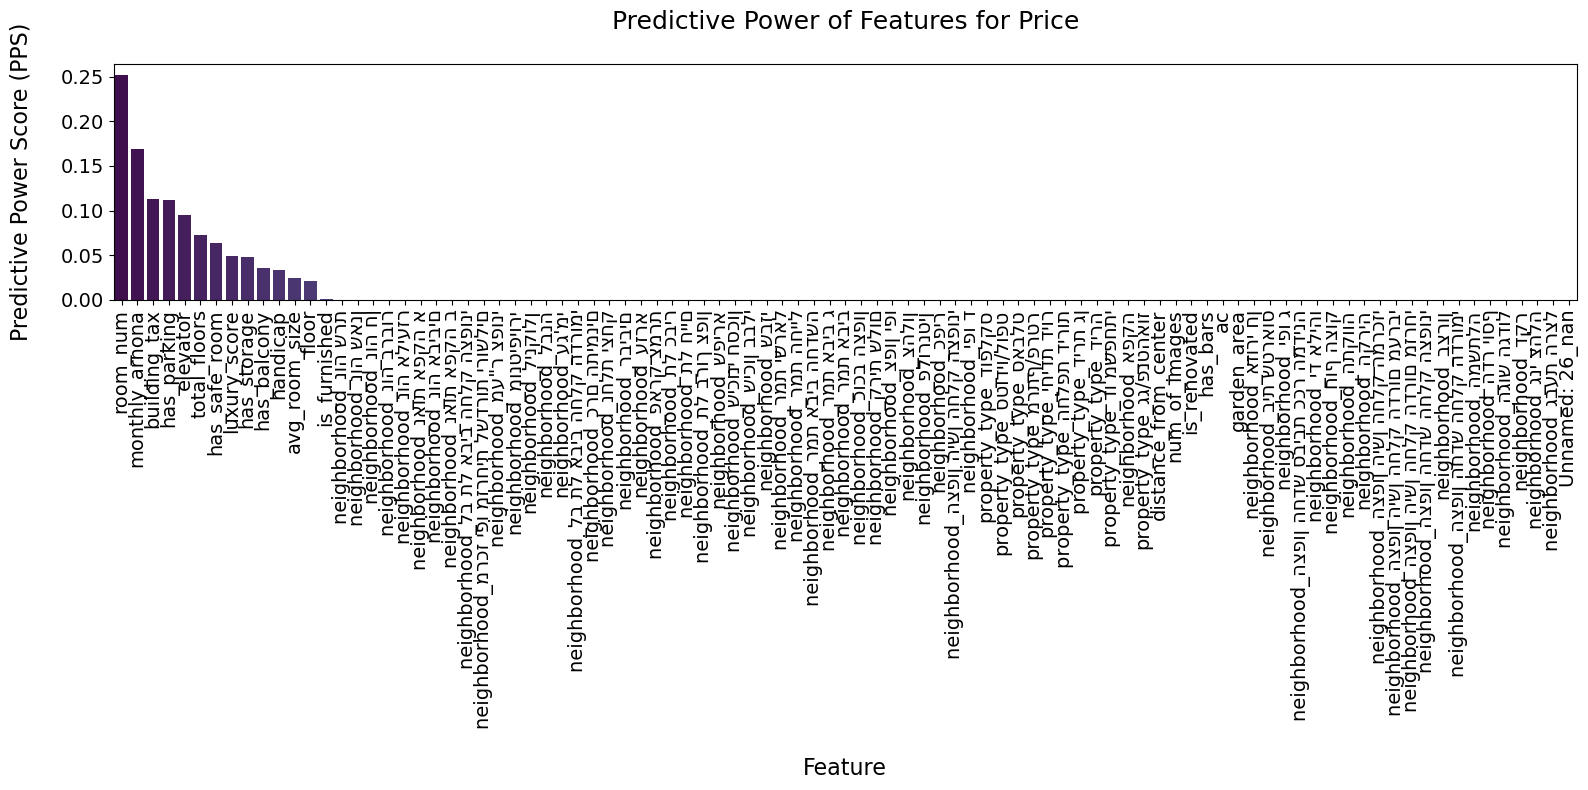

In [30]:
pps_results = pps.predictors(prepared, "price")

pps_results_sorted = pps_results.sort_values(by='ppscore', ascending=False)

plt.figure(figsize=(16,8))
sns.barplot(x='x', y='ppscore', data=pps_results_sorted, palette='viridis')

plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature', fontsize=16, labelpad=20)
plt.ylabel('Predictive Power Score (PPS)', fontsize=16, labelpad=20)
plt.title('Predictive Power of Features for Price', fontsize=18, pad=25)

plt.tight_layout()
plt.show()

<div dir="rtl">

◊î◊ß◊ï◊ì ◊û◊ë◊¶◊¢ ◊†◊ô◊™◊ï◊ó ◊©◊ú ◊û◊ì◊ì <bdi>PPS</bdi> ‚Äì ◊û◊ì◊ì ◊©◊û◊ï◊ì◊ì ◊ê◊™ ◊ô◊õ◊ï◊ú◊™ ◊î◊†◊ô◊ë◊ï◊ô ◊©◊ú ◊õ◊ú <bdi>feature</bdi>  ◊ë◊†◊§◊®◊ì, ◊ë◊ô◊ó◊° ◊ú◊¢◊û◊ï◊ì◊™ ◊î◊û◊ò◊®◊î .  
◊û◊ì◊ï◊ë◊® ◊ë◊û◊ì◊ì ◊í◊û◊ô◊© ◊ô◊ï◊™◊® ◊û◊ê◊©◊® ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊®◊í◊ô◊ú◊î, ◊û◊©◊ï◊ù ◊©◊î◊ï◊ê ◊ê◊ô◊†◊ï ◊û◊†◊ô◊ó ◊ß◊©◊® ◊ú◊ô◊†◊ô◊ê◊®◊ô ◊ë◊ú◊ë◊ì.  

◊û◊î◊†◊ô◊™◊ï◊ó ◊¢◊ï◊ú◊î ◊õ◊ô ◊ß◊ô◊ô◊û◊ï◊™ ◊õ÷æ15 ◊¢◊û◊ï◊ì◊ï◊™ ◊¢◊ù ◊î◊©◊§◊¢◊î ◊ó◊ñ◊ß◊î ◊¢◊ú ◊î◊û◊ï◊ì◊ú. ◊¢◊ù ◊ñ◊ê◊™, ◊í◊ù ◊ú◊§◊ô◊¶'◊®◊ô◊ù ◊¢◊ù ◊™◊®◊ï◊û◊î ◊†◊û◊ï◊õ◊î ◊ô◊ï◊™◊® ◊ô◊ô◊™◊õ◊ü ◊ï◊ô◊© ◊¢◊®◊ö ◊û◊ï◊°◊£ ◊õ◊ê◊©◊® ◊î◊ù ◊†◊ë◊ó◊†◊ô◊ù ◊ô◊ó◊ì ◊¢◊ù ◊§◊ô◊¶'◊®◊ô◊ù ◊ê◊ó◊®◊ô◊ù. ◊ú◊õ◊ü ◊î◊ó◊ú◊ò◊†◊ï **◊ú◊î◊©◊ê◊ô◊® ◊ê◊™ ◊õ◊ú◊ú ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊ë◊û◊ï◊ì◊ú**, ◊õ◊ì◊ô ◊ú◊ê ◊ú◊ê◊ë◊ì ◊û◊ô◊ì◊¢ ◊§◊ï◊ò◊†◊¶◊ô◊ê◊ú◊ô.  

</div>


## step 2 -Elestic Net 

 ###  pps ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊©◊ô◊©◊§◊ô◊¢◊ï ◊ú◊ì◊¢◊™◊†◊ï ◊¢◊ú ◊î◊û◊ï◊ì◊ú ◊ú◊§◊ô ◊ë◊ì◊ô◊ß◊™ 
- room_num
- floor
- area
- total_floors
- has_ parking 
- elavator
- has_safe_room
- has_balacony
- is_furnished
- handicap
- has_storage
- mounthly_arnona
- luxury_score
- avg_room_size
- building_tax

<div dir="rtl" style="text-align: right;">

◊ë◊ô◊¶◊¢◊†◊ï ◊†◊ô◊™◊ï◊ó ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊ë◊ô◊ü ◊î◊§◊ô◊¶'◊®◊ô◊ù, ◊ï◊ñ◊ô◊î◊ô◊†◊ï ◊©◊ß◊ô◊ô◊û◊™ ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊í◊ë◊ï◊î◊î ◊ë◊ô◊ü ◊î◊¢◊û◊ï◊ì◊î <bdi>area</bdi> ◊ú <bdi>room_num</bdi>.  
◊û◊¶◊ë ◊ñ◊î ◊û◊¢◊ô◊ì ◊¢◊ú ◊ó◊§◊ô◊§◊î ◊ë◊û◊ô◊ì◊¢ , ◊ê◊©◊® ◊¢◊ú◊ï◊ú◊î ◊ú◊§◊í◊ï◊¢ ◊ë◊û◊ï◊ì◊ú ◊ë◊õ◊ö ◊©◊î◊ï◊ê ◊ô◊ô◊©◊¢◊ü ◊¢◊ú ◊û◊ô◊ì◊¢ ◊û◊ô◊ï◊™◊®.  
◊ú◊ê◊ó◊® ◊î◊©◊ï◊ï◊ê◊î ◊ë◊ô◊ü ◊î◊û◊ï◊ì◊ú◊ô◊ù ◊¢◊ù ◊ï◊ë◊ú◊ô ◊î◊¢◊û◊ï◊ì◊î, ◊û◊¶◊ê◊†◊ï ◊õ◊ô ◊î◊û◊ï◊ì◊ú **◊û◊©◊™◊§◊® ◊û◊¢◊ò ◊õ◊ê◊©◊® ◊î◊¢◊û◊ï◊ì◊î ◊û◊ï◊°◊®◊™**.  
◊ú◊§◊ô◊õ◊ö, ◊ë◊ó◊®◊†◊ï ◊ú◊î◊°◊ô◊® ◊ê◊™ <bdi>area</bdi> ◊û◊î◊û◊ï◊ì◊ú, ◊õ◊ì◊ô ◊ú◊î◊§◊ó◊ô◊™ ◊™◊ú◊ï◊™ ◊û◊ô◊ï◊™◊®◊™.

◊ë◊†◊ï◊°◊£, ◊û◊¶◊ê◊†◊ï ◊ß◊ï◊®◊ú◊¶◊ô◊î ◊í◊ë◊ï◊î◊î ◊ë◊ô◊ü ◊î◊§◊ô◊¶'◊®◊ô◊ù <bdi>has_elevator</bdi> ◊ï÷æ<bdi>has_parking</bdi>.  
◊¢◊ù ◊ñ◊ê◊™, ◊û◊ê◊ó◊® ◊©◊ê◊ô◊ü ◊ß◊©◊® ◊°◊ô◊ë◊™◊ô ◊ô◊©◊ô◊® ◊ë◊ô◊ü ◊î◊©◊†◊ô◊ô◊ù, ◊ï◊ú◊ê◊ó◊® ◊ë◊ì◊ô◊ß◊î ◊®◊ê◊ô◊†◊ï ◊õ◊ô ◊î◊°◊®◊™ ◊ê◊ó◊ì ◊û◊î◊ù **◊ê◊ô◊†◊î ◊™◊ï◊®◊û◊™ ◊ú◊ì◊ô◊ï◊ß ◊î◊û◊ï◊ì◊ú** ‚Äì ◊î◊ó◊ú◊ò◊†◊ï ◊ú◊î◊©◊ê◊ô◊® ◊ê◊™ ◊©◊†◊ô◊î◊ù.

</div>


◊™◊ï◊¶◊ê◊ï◊™ ◊î◊û◊ï◊ì◊ú Elastic Net:
R¬≤: 0.661 | RMSE: 2305.657 | MAE: 1472.427


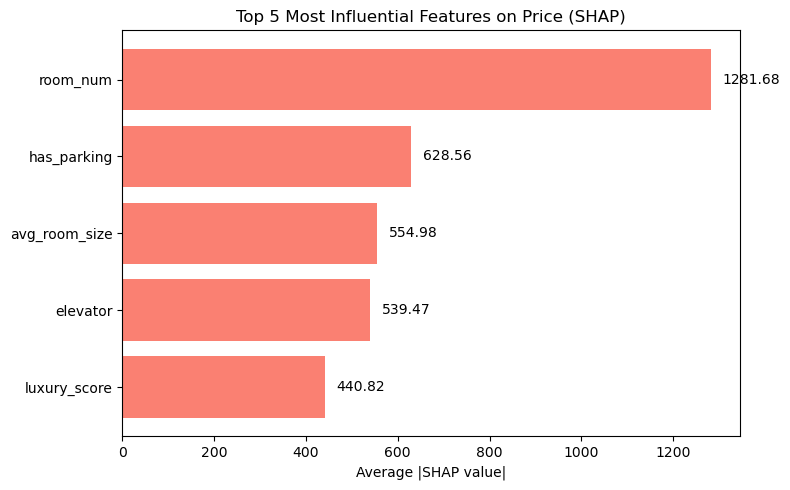

In [31]:
y = prepared['price']
X_prepared = prepared.drop(columns=['price'])  # ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊™ ◊û◊ò◊®◊î ◊ï-area

# ◊©◊ú◊ë 2: ◊ê◊ô◊û◊ï◊ü ◊û◊ï◊ì◊ú ElasticNetCV
alphas = [0.01]
l1_ratios = [0.99]
en_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10, max_iter=5000, random_state=42)
en_model.fit(X_prepared, y)

# ◊©◊ú◊ë 3: ◊î◊¢◊®◊õ◊™ ◊î◊û◊ï◊ì◊ú
y_pred = en_model.predict(X_prepared)
elastic_r2 = r2_score(y, y_pred)
elastic_rmse = np.sqrt(mean_squared_error(y, y_pred))
elastic_mae = mean_absolute_error(y, y_pred)
print("◊™◊ï◊¶◊ê◊ï◊™ ◊î◊û◊ï◊ì◊ú Elastic Net:")
print(f"R¬≤: {elastic_r2:.3f} | RMSE: {elastic_rmse:.3f} | MAE: {elastic_mae:.3f}")

# ◊©◊ú◊ë 4: ◊ó◊ô◊©◊ï◊ë ◊ó◊©◊ô◊ë◊ï◊™ ◊§◊ô◊¶'◊®◊ô◊ù ◊¢◊ù SHAP
explainer = shap.Explainer(en_model, X_prepared)
shap_values = explainer(X_prepared)

mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.Series(mean_abs_shap, index=X_prepared.columns)

# ◊ë◊ó◊ô◊®◊™ 5 ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊î◊û◊©◊§◊ô◊¢◊ô◊ù ◊ë◊ô◊ï◊™◊®
top5 = feature_importance.sort_values(ascending=False).head(5)


# ◊©◊ú◊ë 5: ◊¶◊ô◊ï◊® ◊í◊®◊£
plt.figure(figsize=(8, 5))
bars = plt.barh(top5.index[::-1], top5.values[::-1], color='salmon')  # ◊û◊î◊í◊ë◊ï◊î ◊ú◊†◊û◊ï◊ö
plt.xlabel("Average |SHAP value|")
plt.title("Top 5 Most Influential Features on Price (SHAP)")

# ◊î◊ï◊°◊§◊™ ◊¢◊®◊õ◊ô◊ù ◊¢◊ú ◊î◊í◊®◊£
for bar in bars:
    width = bar.get_width()
    plt.text(width + top5.max() * 0.02, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()


## ◊ó◊û◊©◊™ ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊ë◊¢◊ú◊ô ◊î◊î◊©◊§◊¢◊î ◊î◊í◊ì◊ï◊ú◊î ◊ë◊ô◊ï◊™◊®:
* room_num
* has_parking
* avg_room_size
* elevator
* luxury_score

#### Creating a PKL file

In [33]:
#joblib.dump(en_model, 'en_model.pkl')

['en_model.pkl']

## step 3- Decision Tree

##### ◊û◊ê◊ï◊™◊î ◊°◊ô◊ë◊î ◊õ◊û◊ï ◊ë◊û◊ï◊ì◊ú ◊î◊ß◊ï◊ì◊ù, ◊î◊°◊®◊†◊ï ◊ê◊™ ◊î◊¢◊û◊ï◊ì◊î <bdi>area</bdi> ‚Äì ◊ë◊©◊ú ◊ó◊§◊ô◊§◊î ◊í◊ë◊ï◊î◊î ◊¢◊ù ◊§◊ô◊¶'◊®◊ô◊ù ◊ê◊ó◊®◊ô◊ù ◊©◊¢◊ú◊ï◊ú◊î ◊ú◊§◊í◊ï◊¢ ◊ë◊ë◊ô◊¶◊ï◊¢◊ô ◊î◊û◊ï◊ì◊ú.


üìå ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊î◊ò◊ï◊ë◊ô◊ù ◊ë◊ô◊ï◊™◊®:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

 ◊™◊ï◊¶◊ê◊ï◊™ ◊î◊û◊ï◊ì◊ú Random Forest:
R¬≤: 0.876 | RMSE: 1397.754 | MAE: 894.642

 10-fold CV RMSE: 2607.6090 (+/- 443.2242)


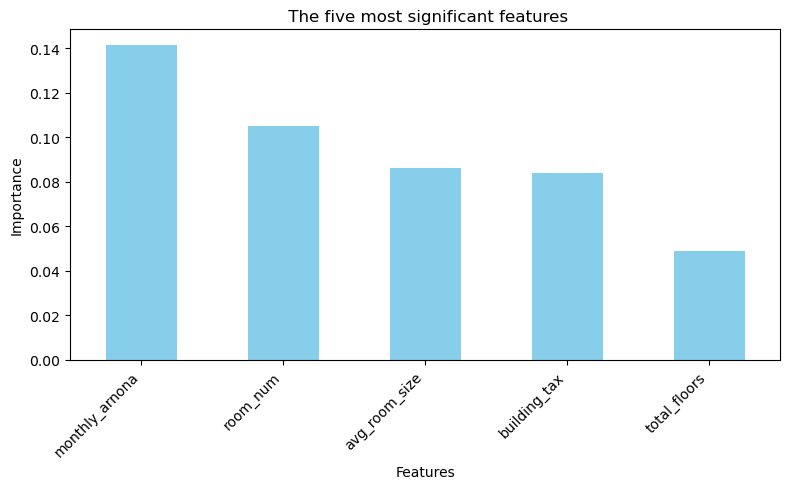

In [34]:
df = prepared.copy()
target = 'price'
X = df.drop(columns=[target])
y = df[target]

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

search = GridSearchCV(rf, param_grid, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
search.fit(X, y)

print(f"üìå ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊î◊ò◊ï◊ë◊ô◊ù ◊ë◊ô◊ï◊™◊®:\n{search.best_params_}\n")

best_rf = search.best_estimator_
y_pred_rf = best_rf.predict(X)

rf_r2 = r2_score(y, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y, y_pred_rf))
rf_mae = mean_absolute_error(y, y_pred_rf)

print(" ◊™◊ï◊¶◊ê◊ï◊™ ◊î◊û◊ï◊ì◊ú Random Forest:")
print(f"R¬≤: {rf_r2:.3f} | RMSE: {rf_rmse:.3f} | MAE: {rf_mae:.3f}\n")

cv_scores = cross_val_score(best_rf, X, y, cv=10, scoring='neg_root_mean_squared_error')
print(f" 10-fold CV RMSE: {-np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top5_features = feature_importances.sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top5_features.plot(kind='bar', color='skyblue')
plt.title(' The five most significant features')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## grid search

<div dir="rtl">
◊ú◊ë◊ô◊¶◊ï◊¢ ◊ê◊ï◊§◊ò◊ô◊û◊ô◊ñ◊¶◊ô◊î ◊©◊ú ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊ë◊û◊ï◊ì◊ú Random Forest ◊î◊©◊™◊û◊©◊†◊ï ◊ë◊©◊ô◊ò◊™ Grid Search ◊¢◊ù 10-fold Cross Validation.
◊ë◊ó◊®◊™◊ô ◊ë÷æGrid Search ◊û◊î◊°◊ô◊ë◊ï◊™ ◊î◊ë◊ê◊ï◊™:
◊û◊®◊ó◊ë ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊©◊ú◊ô ◊î◊ô◊î ◊û◊¶◊ï◊û◊¶◊ù ◊ô◊ó◊°◊ô◊™, ◊ï◊ú◊õ◊ü ◊ê◊§◊©◊® ◊ú◊ë◊¶◊¢ ◊ó◊ô◊§◊ï◊© ◊û◊ú◊ê ◊û◊ë◊ú◊ô ◊©◊î◊ñ◊û◊ü ◊ô◊î◊ô◊î ◊ê◊®◊ï◊ö ◊û◊ì◊ô.
Grid Search ◊û◊ê◊§◊©◊®◊™ ◊ó◊ô◊§◊ï◊© ◊©◊ô◊ò◊™◊ô ◊©◊ú ◊õ◊ú ◊î◊¶◊ô◊®◊ï◊§◊ô◊ù, ◊ï◊û◊ï◊ï◊ì◊ê◊™ ◊©◊ú◊ê ◊û◊§◊°◊§◊°◊ô◊ù ◊©◊ô◊ú◊ï◊ë ◊û◊ï◊¶◊ú◊ó.
◊î◊©◊ô◊ò◊î ◊§◊©◊ï◊ò◊î, ◊©◊ß◊ï◊§◊î, ◊ï◊ß◊ú◊î ◊ú◊î◊¶◊í◊î.
</div>

### ◊ó◊û◊©◊™ ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊ë◊¢◊ú◊ô ◊î◊î◊©◊§◊¢◊î ◊î◊í◊ì◊ï◊ú◊î ◊ë◊ô◊ï◊™◊®:
* mounthly_arnona
* room_num
* avg_room_size
* building_tax
* total_floor

### ◊î◊©◊ï◊ï◊ê◊î ◊ë◊ô◊ü ◊î◊û◊ï◊ì◊ú◊ô◊ù

In [35]:
results = {
    '◊û◊ï◊ì◊ú': ['Elastic Net', 'Random Forest'],
    'RMSE': [elastic_rmse, rf_rmse], 
    'MAE': [elastic_mae, rf_mae],
    'R¬≤': [elastic_r2, rf_r2]
}

performance_df = pd.DataFrame(results)
performance_df.set_index('◊û◊ï◊ì◊ú', inplace=True)

print(" ◊î◊©◊ï◊ï◊ê◊™ ◊ë◊ô◊¶◊ï◊¢◊ô ◊î◊û◊ï◊ì◊ú◊ô◊ù:")
display(performance_df)

# top5 ◊û◊î◊©◊§◊¢◊ï◊™ SHAP ◊©◊ú ElasticNet
elastic_top5 = top5.index.tolist()

# top5 ◊ú◊§◊ô ◊ó◊©◊ô◊ë◊ï◊™ ◊û◊î◊ô◊¢◊® ◊î◊û◊ß◊®◊ô
rf_top5 = top5_features.index.tolist()

# ◊ô◊¶◊ô◊®◊™ ◊ò◊ë◊ú◊™ ◊î◊©◊ï◊ï◊ê◊î
features_df = pd.DataFrame({
    'Elastic Net': elastic_top5,
    'Random Forest': rf_top5
})

print(" ◊î◊©◊ï◊ï◊ê◊™ ◊ó◊û◊©◊™ ◊î◊§◊ô◊¶‚Äô◊®◊ô◊ù ◊î◊ó◊©◊ï◊ë◊ô◊ù ◊ë◊ô◊ï◊™◊® ◊ë◊õ◊ú ◊û◊ï◊ì◊ú:")
display(features_df)


 ◊î◊©◊ï◊ï◊ê◊™ ◊ë◊ô◊¶◊ï◊¢◊ô ◊î◊û◊ï◊ì◊ú◊ô◊ù:


RMSE          MAE        R¬≤
◊û◊ï◊ì◊ú                                             
Elastic Net    2305.656918  1472.427189  0.661332
Random Forest  1397.754343   894.642199  0.875535

 ◊î◊©◊ï◊ï◊ê◊™ ◊ó◊û◊©◊™ ◊î◊§◊ô◊¶‚Äô◊®◊ô◊ù ◊î◊ó◊©◊ï◊ë◊ô◊ù ◊ë◊ô◊ï◊™◊® ◊ë◊õ◊ú ◊û◊ï◊ì◊ú:


Elastic Net   Random Forest
0       room_num  monthly_arnona
1    has_parking        room_num
2  avg_room_size   avg_room_size
3       elevator    building_tax
4   luxury_score    total_floors

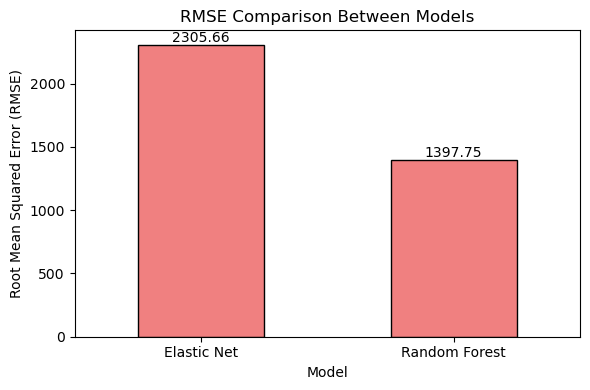

In [36]:
plt.figure(figsize=(6, 4))
performance_df['RMSE'].plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("RMSE Comparison Between Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("Model")
plt.xticks(rotation=0)

# Display values above bars
for idx, val in enumerate(performance_df['RMSE']):
    plt.text(idx, val + 0.01 * max(performance_df['RMSE']), f"{val:.2f}", ha='center')

plt.tight_layout()
plt.show()


<div dir="rtl">

### ◊û◊ë◊ó◊ô◊†◊™ ◊î◊û◊ì◊ì◊ô◊ù:
</div>
<div dir="rtl">
◊î◊û◊ï◊ì◊ú ◊î◊ú◊ê-◊ú◊ô◊†◊ê◊®◊ô  ◊î◊¶◊ô◊í ◊ë◊ô◊¶◊ï◊¢◊ô◊ù ◊ò◊ï◊ë◊ô◊ù ◊ë◊î◊®◊ë◊î ◊û◊û◊ï◊ì◊ú ◊î◊ê◊ú◊°◊ò◊ô◊ß ◊†◊ò ◊ë◊õ◊ú ◊î◊û◊ì◊ì◊ô◊ù . ◊î◊ì◊ë◊® ◊û◊¶◊ë◊ô◊¢ ◊¢◊ú ◊õ◊ö ◊©◊î◊ß◊©◊®◊ô◊ù ◊ë◊ô◊ü ◊î◊§◊ô◊¶‚Äô◊®◊ô◊ù ◊ú◊û◊ó◊ô◊® ◊ê◊ô◊†◊ù ◊ú◊í◊û◊®◊ô ◊ú◊ô◊†◊ê◊®◊ô◊ô◊ù, ◊ï◊ú◊õ◊ü ◊û◊ï◊ì◊ú ◊§◊©◊ï◊ò ◊õ◊û◊ï ◊ê◊ú◊°◊ò◊ô◊ß ◊†◊ò ◊ú◊ê ◊î◊¶◊ú◊ô◊ó ◊ú◊ú◊õ◊ï◊ì ◊ê◊™ ◊î◊û◊ï◊®◊õ◊ë◊ï◊™ ◊©◊ú ◊î◊ß◊©◊®◊ô◊ù ◊õ◊û◊ï ◊©◊î◊¶◊ú◊ô◊ó ◊û◊ï◊ì◊ú ◊î◊¢◊•.
◊ô◊™◊õ◊ü ◊í◊ù ◊©◊î◊ô◊ï ◊ê◊ô◊†◊ò◊®◊ê◊ß◊¶◊ô◊ï◊™ ◊û◊ï◊®◊õ◊ë◊ï◊™ ◊ë◊ô◊ü ◊û◊©◊™◊†◊ô◊ù (◊õ◊û◊ï ◊ë◊ô◊ü ◊û◊°◊§◊® ◊ó◊ì◊®◊ô◊ù ◊ú◊ê◊®◊†◊ï◊†◊î), ◊©◊û◊ï◊ì◊ú ◊î◊¢◊• ◊ô◊ì◊¢ ◊ú◊ú◊û◊ï◊ì ‚Äì ◊ë◊¢◊ï◊ì ◊©◊û◊ï◊ì◊ú ◊ú◊ô◊†◊ê◊®◊ô ◊û◊™◊ß◊©◊î ◊ú◊¢◊©◊ï◊™ ◊ñ◊ê◊™.
 </div>
 
  <div dir="rtl">

### ◊û◊ë◊ó◊ô◊†◊™ ◊î◊§◊ô◊¶‚Äô◊®◊ô◊ù:
 </div>
    <div dir="rtl">
◊©◊†◊ô ◊î◊û◊ï◊ì◊ú◊ô◊ù ◊ñ◊ô◊î◊ï ◊ê◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊û◊°◊§◊® ◊ó◊ì◊®◊ô◊ù ◊ï◊û◊û◊ï◊¶◊¢ ◊í◊ï◊ì◊ú ◊ó◊ì◊® ◊õ◊ó◊©◊ï◊ë◊ô◊ù ◊ë◊û◊ô◊ï◊ó◊ì, ◊û◊î ◊©◊û◊¶◊ë◊ô◊¢ ◊¢◊ú ◊î◊ß◊©◊® ◊î◊ô◊©◊ô◊® ◊ï◊î◊ë◊®◊ï◊® ◊©◊ú◊î◊ù ◊ú◊û◊ó◊ô◊® ◊î◊ì◊ô◊®◊î ‚Äì ◊õ◊ú◊ï◊û◊®, ◊ô◊ï◊™◊® ◊ó◊ì◊®◊ô◊ù ◊ê◊ï ◊ó◊ì◊®◊ô◊ù ◊í◊ì◊ï◊ú◊ô◊ù ◊ô◊ï◊™◊® ◊û◊©◊§◊ô◊¢◊ô◊ù ◊¢◊ú ◊î◊û◊ó◊ô◊® ◊ë◊ê◊ï◊§◊ü ◊û◊ï◊ë◊î◊ß.
◊û◊ï◊ì◊ú ◊î◊ê◊ú◊°◊ò◊ô◊ß ◊†◊ò ◊î◊™◊û◊ß◊ì ◊ë◊§◊ô◊¶‚Äô◊®◊ô◊ù ◊¢◊ù ◊î◊©◊§◊¢◊î ◊ë◊®◊ï◊®◊î ◊ï◊ú◊ô◊†◊ê◊®◊ô◊™ ‚Äì ◊õ◊û◊ï ◊ó◊†◊ô◊ô◊î, ◊û◊¢◊ú◊ô◊™ ◊ï◊®◊û◊™ ◊ô◊ï◊ß◊®◊î. ◊ú◊¢◊ï◊û◊™◊ï, ◊û◊ï◊ì◊ú ◊î◊¢◊• ◊î◊ì◊í◊ô◊© ◊§◊ô◊¶‚Äô◊®◊ô◊ù ◊©◊ê◊ï◊ú◊ô ◊û◊¢◊ô◊ì◊ô◊ù ◊¢◊ú ◊ß◊©◊®◊ô◊ù ◊û◊ï◊®◊õ◊ë◊ô◊ù ◊ê◊ï ◊¢◊ß◊ô◊§◊ô◊ù ‚Äì ◊õ◊û◊ï ◊í◊ï◊ë◊î ◊î◊ê◊®◊†◊ï◊†◊î ◊î◊ó◊ï◊ì◊©◊ô◊™ ◊ê◊ï ◊û◊°◊§◊® ◊î◊ß◊ï◊û◊ï◊™ ◊ë◊ë◊†◊ô◊ô◊ü, ◊©◊ô◊õ◊ï◊ú◊ô◊ù ◊ú◊©◊ß◊£ ◊û◊ô◊ß◊ï◊ù, ◊ô◊ï◊ß◊®◊î ◊ê◊ï ◊™◊©◊™◊ô◊ï◊™, ◊ë◊¶◊ï◊®◊î ◊¢◊ß◊ô◊§◊î.
◊ú◊õ◊ü ◊†◊ô◊™◊ü ◊ú◊î◊°◊ô◊ß ◊©◊û◊ï◊ì◊ú ◊î◊¢◊• ◊ú◊ê ◊®◊ß ◊û◊™◊ê◊ô◊ù ◊ô◊ï◊™◊® ◊ú◊†◊™◊ï◊†◊ô◊ù ◊©◊ú◊†◊ï, ◊ê◊ú◊ê ◊í◊ù ◊û◊¶◊ú◊ô◊ó ◊ú◊ó◊©◊ï◊£ ◊ì◊§◊ï◊°◊ô◊ù ◊¢◊û◊ï◊ß◊ô◊ù ◊ô◊ï◊™◊® ◊©◊ú◊ê ◊ë◊ê◊ô◊ù ◊ú◊ô◊ì◊ô ◊ë◊ô◊ò◊ï◊ô ◊ë◊¶◊ï◊®◊î ◊ú◊ô◊†◊ê◊®◊ô◊™.

</div>